<a href="https://colab.research.google.com/github/SauleAbenova/exam/blob/main/Home%20work22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1. Установка Google Chrome (не chromium!)
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y


--2025-04-25 05:20:53--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 209.85.200.91, 209.85.200.136, 209.85.200.93, ...
Connecting to dl.google.com (dl.google.com)|209.85.200.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115150800 (110M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb.1’

google-chrome-stabl 100%[===================>] 109.82M   327MB/s    in 0.3s    

2025-04-25 05:20:54 (327 MB/s) - ‘google-chrome-stable_current_amd64.deb.1’ saved [115150800/115150800]

(Reading database ... 126945 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (135.0.7049.114-1) over (135.0.7049.114-1) ...
Setting up google-chrome-stable (135.0.7049.114-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package l

In [ ]:
!apt install unzip -y
!wget -O /tmp/chromedriver.zip https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/bin/
!chmod +x /usr/bin/chromedriver


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
--2025-04-25 05:21:13--  https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 142.251.183.207, 64.233.179.207, 74.125.126.207, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|142.251.183.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407250 (7.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   7.06M  --.-KB/s    in 0.03s   

2025-04-25 05:21:13 (206 MB/s) - ‘/tmp/chromedriver.zip’ saved [7407250/7407250]

Archive:  /tmp/chromedriver.zip
replace /usr/bin/chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!google-chrome --version



Google Chrome 135.0.7049.114 


In [ ]:
!wget -O /tmp/chromedriver.zip https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.114/linux64/chromedriver-linux64.zip
!unzip /tmp/chromedriver.zip chromedriver-linux64/chromedriver -d /usr/bin/
!mv /usr/bin/chromedriver-linux64/chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver


--2025-04-25 05:26:51--  https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/135.0.7049.114/linux64/chromedriver-linux64.zip
Resolving edgedl.me.gvt1.com (edgedl.me.gvt1.com)... 34.104.35.123, 2600:1900:4110:86f::
Connecting to edgedl.me.gvt1.com (edgedl.me.gvt1.com)|34.104.35.123|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/chrome-for-testing-public/135.0.7049.114/linux64/chromedriver-linux64.zip [following]
--2025-04-25 05:26:51--  https://storage.googleapis.com/chrome-for-testing-public/135.0.7049.114/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.179.207, 74.125.126.207, 142.251.184.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9581894 (9.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   9

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = "/usr/bin/google-chrome"

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)
driver.get("https://www.google.com")
print(driver.title)  # Должно вывести "Google"


Google


In [ ]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn


In [3]:
import requests
import pandas as pd
import re

query = "노트북"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# ⚠️ Здесь мы хитро подставляем offset (0, 20, 40...) — постранично
url = f"https://api.bunjang.co.kr/api/1/find_v2.json?q={query}&order=score&n=20&page=100"

response = requests.get(url, headers=headers)
data = response.json()

items = data["list"]

titles, prices, links = [], [], []

for item in items:
    titles.append(item["name"])
    prices.append(item["price"])
    links.append("https://m.bunjang.co.kr/products/" + item["pid"])

# DataFrame
df = pd.DataFrame({
    "제목": titles,
    "가격": prices,
    "링크": links
})

df.head()


,제목,가격,링크
0,2239삼성노트북 인텔코어/화이트바디/980g/15인치,349000,https://m.bunjang.co.kr/products/329842818
1,갤럭시북 Flex i7 MX250 고사양 노트북,870000,https://m.bunjang.co.kr/products/324658014
2,2237삼성노트북 15인치/980g/인텔코어/FHD/SSD,349000,https://m.bunjang.co.kr/products/329840897
3,2235삼성노트북 터치스크린/S펜/테블릿모드/980g,416000,https://m.bunjang.co.kr/products/329839062
4,삼성 RC530 노트북 i5-2410m 램8 SSD120,59000,https://m.bunjang.co.kr/products/329732390


In [4]:
all_titles, all_prices, all_links = [], [], []

for page in range(100):  # 0 ~ 99
    url = f"https://api.bunjang.co.kr/api/1/find_v2.json?q={query}&order=score&n=20&page={page}"
    response = requests.get(url, headers=headers)
    data = response.json()
    items = data.get("list", [])

    if not items:  # если пусто — прерываем
        break

    for item in items:
        all_titles.append(item["name"])
        all_prices.append(item["price"])
        all_links.append("https://m.bunjang.co.kr/products/" + item["pid"])

# В DataFrame
df = pd.DataFrame({
    "제목": all_titles,
    "가격": all_prices,
    "링크": all_links
})

df["가격"] = pd.to_numeric(df["가격"], errors="coerce")
print("총 상품 수:", len(df))
df.head()


총 상품 수: 2000


,제목,가격,링크
0,게이밍 노트북 고가에 상시 매입합니다!,54250000,https://m.bunjang.co.kr/products/306540179
1,삼성 아티브탭3 사무용 인강용 미니 노트북,85000,https://m.bunjang.co.kr/products/325601029
2,MSI GL시리즈 GL63 8RD-i7 게이밍 노트북,370000,https://m.bunjang.co.kr/products/330125144
3,삼성 노트북 NT530U3B-A5H,130000,https://m.bunjang.co.kr/products/329854026
4,[매입]미개봉 LG그램 갤럭시북 맥북 기업용 대량매입 게이밍 노트북,4000000,https://m.bunjang.co.kr/products/330124247


In [6]:
df.sort_values("가격", ascending=False).head(10)


,제목,가격,링크
1593,"고장난 컴퓨터,노트북 매입합니다.",999999999,https://m.bunjang.co.kr/products/227071359
460,고장난 게이밍 노트북 삽니다.,999999999,https://m.bunjang.co.kr/products/294158063
1574,"고장난 노트북,컴퓨터 매입합니다.",999999999,https://m.bunjang.co.kr/products/294156391
470,고장난 게이밍 노트북 삽니다.,999999999,https://m.bunjang.co.kr/products/294158864
517,고장난 노트북 컴퓨터 매입합니다.,999999999,https://m.bunjang.co.kr/products/294160395
1828,중고아이패드애플워치갤럭시탭갤럭시워치드론VR컴퓨터노트북IT기기 전국출장매입,777777777,https://m.bunjang.co.kr/products/315587021
754,전국매입 중고컴퓨터데스크탑랩탑사무용게이밍컴퓨터노트북드론맥북태블릿 출장매입,555555555,https://m.bunjang.co.kr/products/315585997
274,전국출장매입중고태블릿레노버아이디어패드애플아이패드갤럭시탭드론컴퓨터노트북,444444444,https://m.bunjang.co.kr/products/315646284
715,중고노트북 갤럭시북 엘지그램 레노버 맥북 출장매입 당일입금,333333333,https://m.bunjang.co.kr/products/315641420
706,중고노트북아수스노트북레노버노트북맥북갤럭시북엘지그램사무용게이밍노트북매입,333333333,https://m.bunjang.co.kr/products/315576091


In [7]:
df_clean = df[df["가격"] < 5000000]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


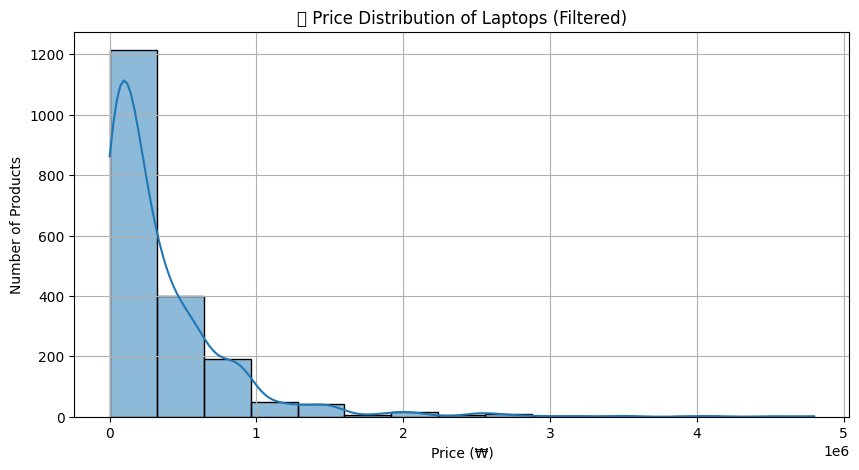

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean["가격"], bins=15, kde=True)
plt.title("💻 Price Distribution of Laptops (Filtered)")
plt.xlabel("Price (₩)")
plt.ylabel("Number of Products")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


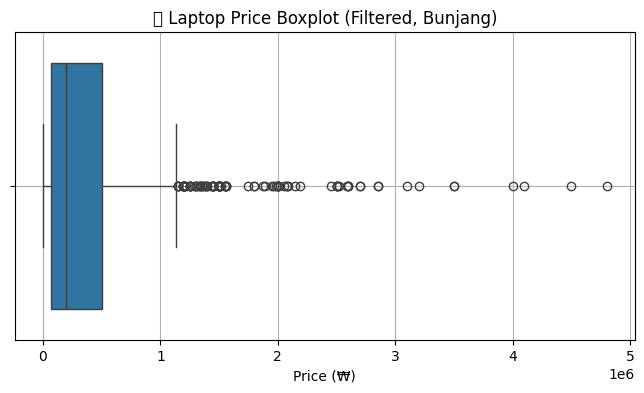

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean["가격"])
plt.title("💻 Laptop Price Boxplot (Filtered, Bunjang)")
plt.xlabel("Price (₩)")
plt.grid(True)
plt.show()


<ipython-input-14-0edd5dab44bf>:6: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  plt.savefig("laptop_boxplot_bunjang.png")  # Сохраняем!
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


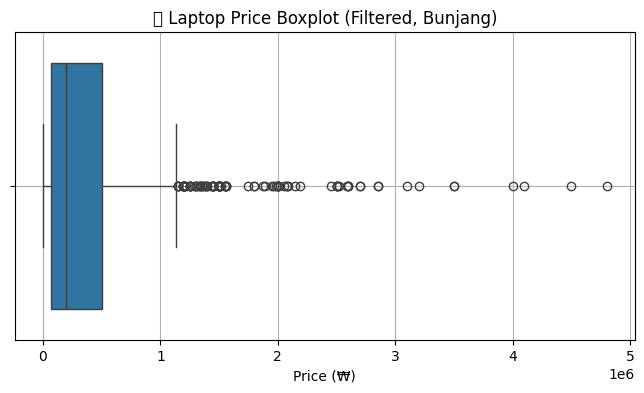

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean["가격"])
plt.title("💻 Laptop Price Boxplot (Filtered, Bunjang)")
plt.xlabel("Price (₩)")
plt.grid(True)
plt.savefig("laptop_boxplot_bunjang.png")  # Сохраняем!
plt.show()


In [ ]:
df["가격"] = pd.to_numeric(df["가격"], errors="coerce")


In [ ]:
print("📌 평균 가격:", round(df["가격"].mean()), "₩")


📌 평균 가격: 3382723 ₩


In [ ]:
df[df["가격"] < 300000]


,제목,가격,링크
1,삼성 아티브탭3 사무용 인강용 미니 노트북,85000,https://m.bunjang.co.kr/products/325601029
6,갓성비 삼성 슬림하고 가벼운 A급 노트북,139000,https://m.bunjang.co.kr/products/329708472
9,"(새상품) 노트북 파우치, 패드 파우치 일괄",32000,https://m.bunjang.co.kr/products/330120524
11,i7 고성능 15.6인치 삼성 노트북 ssd128 ram8,166000,https://m.bunjang.co.kr/products/329487318
15,삼성노트북 아답터 19v 3.16A,7220,https://m.bunjang.co.kr/products/325530725
17,샘소나이트 노트북 백팩,48000,https://m.bunjang.co.kr/products/326023294
18,노트북 파우치 15인치 (7321디자인),18000,https://m.bunjang.co.kr/products/180436060
19,로스모어 노트북 파우치 구해요,1234,https://m.bunjang.co.kr/products/320384243


In [ ]:
df.to_csv("bunjang_laptops.csv", index=False)


In [ ]:
from google.colab import files
files.download("bunjang_laptops.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>